In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("shopping_data.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df = df.drop(["CustomerID","Genre"],axis=1)

In [8]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
df.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()
df_sc = mn.fit_transform(df)

In [24]:
df_sc_df = pd.DataFrame(df_sc, columns = df.columns, index=df.index)

In [25]:
df_sc_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)

In [28]:
km = KMeans(n_clusters = 4)

In [29]:
km.fit(df_sc_df)

KMeans(n_clusters=4)

In [31]:
km.labels_

array([3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 0, 3, 3, 3, 2, 2, 2, 2, 3, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [32]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [33]:
df["cluster_Nos"] = km.labels_

In [34]:
df.head(10)

,Age,Annual Income (k$),Spending Score (1-100),cluster_Nos
0,19,15,39,3
1,21,15,81,3
2,20,16,6,3
3,23,16,77,3
4,31,17,40,3
5,22,17,76,3
6,35,18,6,2
7,23,18,94,3
8,64,19,3,2
9,30,19,72,3


In [36]:
km.inertia_

12.65028767622993

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
silhouette_score(df_sc_df, km.labels_)

0.392319202055722

In [40]:
X = df.iloc[:, [1,2]].values
m = X.shape[0]
n = X.shape[1]
n_iter = 100
k = 5

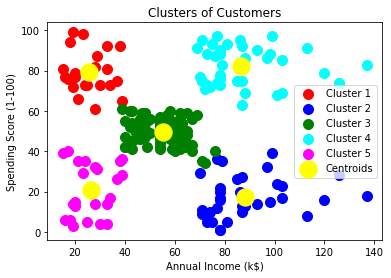

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1],s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1],s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1],s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1],s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1],s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [49]:
X[y_kmeans == 3,0]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137],
      dtype=int64)

C:\Users\wit5\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


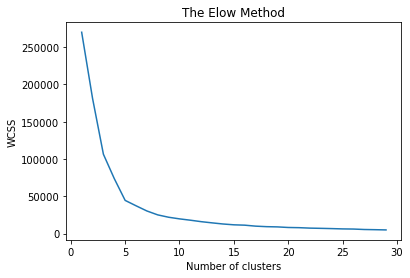

In [50]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,30),wcss)
plt.title('The Elow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()